In [2]:
! jupyter --version


jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.5
ipython          : 7.16.1
ipykernel        : 5.3.2
jupyter client   : 6.1.6
jupyter lab      : 2.1.5
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.7
traitlets        : 4.3.3


# Agenda

- Discussion of tree based methods

- Regression Trees

- Classification Trees

- Comparison of tree models with linear models

- Bootstrap

- Bagging

- Random Forests 

# Part-I: Tree Based Models

- Recall predictors (features or X) vs target (dependent variable, Y)
- Goal in tree based methods: Segmenting the predictor space into a number of simple regions.

## Regression Trees

__Dataset: Baseball Players__



In [1]:
import utils  # a utility script that reads data from google-drive
import pandas as pd 

URL = "https://drive.google.com/file/d/1oryMiwQ6N5kchQHwMsBPL5CrNd089Ha_/view?usp=sharing"
raw = utils.get_data_from_drive(url = URL) # raw is StringIO object
hitters_df = pd.read_csv(raw)[["Hits","Years","Salary" ]]
hitters_df.dropna(inplace  = True) # we drop NAN's without further investigation for the pedagogical purposes.
raw.close() #closing the file 
print(hitters_df.shape)
hitters_df.head(3)

(263, 3)


,Hits,Years,Salary
1,81,14,475.0
2,130,3,480.0
3,141,11,500.0


263 Baseball players.
- Hits: The number of hits that a player made in the previous year

- Years: The number of years that a player has played in the major leagues

__Fitting a regression tree with Scikit-Learn__


<div class="alert alert-block alert-warning">
<b>Note:</b> We didn't applied train-test-split and validation purposes for the sake of class time and not making things more complicated for the introduction of a new concept. In your projects, make sure you apply best practices of data preparation.
</div>

In [4]:
import numpy as np
X = hitters_df[["Hits", "Years"]]
y = hitters_df.Salary
log_y = hitters_df.Salary.apply(np.log)
from sklearn import tree
estimator = tree.DecisionTreeRegressor(max_leaf_nodes= 3)
estimator.fit(X,log_y);

NameError: name 'hitters_df' is not defined

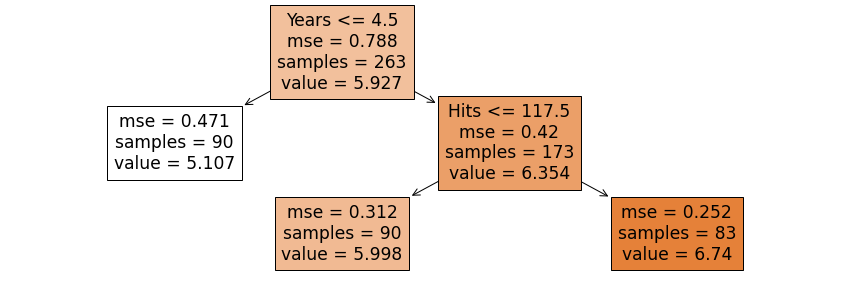

In [3]:
utils.draw_tree(estimator = estimator)

__Another way of seeing things__

<center><img src= "images/partition_of_set.png" style="height:450px"></center>


In [5]:
player1 = {"Hits": 110, "Years": 2}
player2 = {"Hits": 110, "Years": 10}
player3 = {"Hits": 200, "Years": 2}
player4 = {"Hits": 200, "Years": 10}

estimator.predict([[110,2]])

NameError: name 'estimator' is not defined

__Pseudo-Algorithm for decision trees__

1. Divide the predictor space into $J$ distinct and non-overlapping regions (each denoted by $R_{i}$) (partitions)

2. For every new observation in a region $R_{i}$ we make a prediction. Generally by taking the average of the training obervations in $R_{i}$

__Question__

- How to find a 'good' partition?

__Objective Function (Cost Funtion) (RSS)__

To find boxes $R_{1},R_{2}, \cdots, R_{J}$ that minimize the RSS:

<img src= "images/dt_least_square.png" style="height:100px">


__Some challenges in implementation__

__Final Algorithm__
 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.


<img src= "images/Partition_with_5_boxes_ISLR.png" style="height:300px">

<img src= "images/graph_of_partition_with_5_boxes.png" style="height:300px">


__Play Ground__

- Now divide the predictor space into 5 region and estimate the salaries of player1, player2, ..., player5.

array([4.813422])

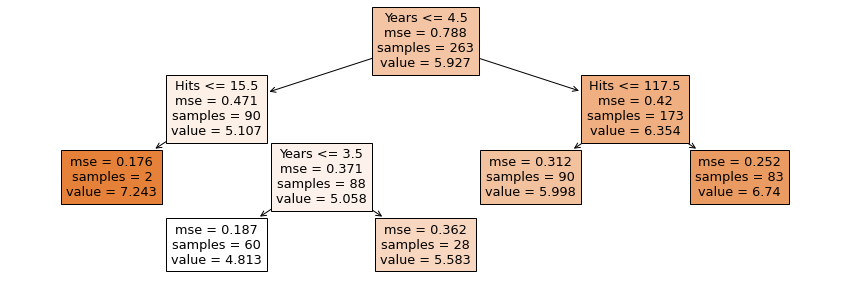

In [9]:
import numpy as np
X = hitters_df[["Hits", "Years"]]
y = hitters_df.Salary
log_y = hitters_df.Salary.apply(np.log)
from sklearn import tree
estimator = tree.DecisionTreeRegressor(max_leaf_nodes= 5)
estimator.fit(X,log_y);
utils.draw_tree(estimator)


player1 = {"Hits": 110, "Years": 2}
player2 = {"Hits": 110, "Years": 10}
player3 = {"Hits": 200, "Years": 2}
player4 = {"Hits": 200, "Years": 10}

estimator.predict([[110,2]])

__Discussion__

- Possible issues when training a tree - Overfitting

- Pruning

- Stopping Criteria's in sklearn. `max_depth`, `min_samples_split`, `min_samples_leaf` etc.

- [For complexity parameter $\alpha$](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

# Classification Trees

1. Divide the predictor space into $J$ distinct and non-overlapping regions (each denoted by $R_{i}$) (partitions)

2. For every new observation in a region $R_{i}$ we make a prediction. Generally by taking the average of the training obervations in $R_{i}$


__More Specifically__

 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.

__More Specifically__

 
- Start with a variable and division that gives the greatest possible reduction in ---

- Continue this approach but only check the --- in resulting regions.

- Stop with a predetermined stopping criteria.

__Toy Dataset__


In [14]:
import pandas as pd
customers= pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])
customers

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

where $p_i$ is the fraction of the $i$th group after a splitting.

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

To repeat, in the present case we have only two groups of interest: the payers (2/5) and the non-payers (3/5).

So our entropy for this toy dataset is:

$-0.4*\log_2(0.4) -0.6*\log_2(0.6)$.

Let's use the ```math``` library to calculate this:

In [15]:
from math import log

# Your code here!

ent_whole = -.4*log(.4,2)-0.6*log(.6,2)
ent_whole

0.9709505944546686

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our question above about salary:

Group 1:

$E_{g1} = 0 * \log_2(0) - 1 * \log_2(1) = 0$. This is a pure group! The probability of being a payer in Group 1 is 0 and the probability of being a non-payer in Group 1 is 1.

Group 2:

$E_{g2} = \frac{2}{3} * \log_2\left(\frac{2}{3}\right) - \frac{1}{3} * \log_2\left(\frac{1}{3}\right)$.

Once again, using ```math```:

__Play Ground__

- If time allows let's see `Classification Trees` in action.

- If not, work with this part on your own.

__Dataset__


In [13]:
URL = "https://drive.google.com/file/d/1S-r_DiKQMQnjMEB0a8OGRvElIqTixNIH/view?usp=sharing"
raw = utils.get_data_from_drive(url = URL)

data = pd.read_csv(raw)
data.rename(columns={'ï»¿age': 'age'}, inplace = True)


X = data.drop('target', axis = 1)
y = data['target']

categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

continuous_variables = [i for i in data.columns.tolist() if i not in categorical_variables]
continuous_variables.remove('target')

heart_df = utils.heart_data_ohe(categorical_variables, continuous_variables, X)

heart_df.head(2)

AttributeError: module 'utils' has no attribute 'heart_data_ohe'

# Resources

[Chapter-8 of ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/)


Q: what is information gain criteria? 

[Watch this video](https://www.youtube.com/watch?v=LDRbO9a6XPU)

Q: What is ID3, C4.5 and CART?

[sklearn documentation 1.10.6](https://scikit-learn.org/stable/modules/tree.html)

Q: What are the tricky things that we should watch out in application?

[sklearn documentation 1.10.5 - Tips on Practical Use](https://scikit-learn.org/stable/modules/tree.html)

Q: Can sklearn plot the structure of a decision tree?

[Check this blog? I didn't fully read this though](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

More readings:

[A chapter from another book. - Looks friendly :)](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)

[What is the difference btwn 'mse' vs 'friedman_mse'](https://projecteuclid.org/euclid.aos/1013203451)

[Categorical Variables with sklearn-trees](https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features)

"Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 